# Improvising Bubble Sort Algorithm in Parallel Execution

In [ ]:
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [ ]:
import numpy as np
original = np.arange(0.0, 10.0, 0.01, dtype='f4')
shuffled = original.copy()
np.random.shuffle(shuffled)

In [ ]:
sorted = shuffled.copy()
bubblesort(sorted)
print(np.array_equal(sorted, original))

True


In [ ]:
%timeit sorted[:] = shuffled[:]; bubblesort(sorted)


179 ms ± 673 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
#Complete the Solution to Q1 (i) here.

from numba import jit, int32

@jit
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [ ]:
#Measure the time of your optimized implementation by running this cell

%timeit sorted[:] = shuffled[:]; bubblesort(sorted)

645 µs ± 2.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#Complete the Solution to Q1 (i) here.
from numba import jit, int32, void

@jit(void(int32))
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [ ]:
#Measure the time of your optimized implementation by running this cell
%timeit sorted[:] = shuffled[:]; bubblesort(sorted)

750 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Q2.

In [ ]:
from scipy.stats import pareto
import matplotlib.pyplot as plt

import numpy as np
import math
from numba import vectorize,float64, cuda

fig, ax = plt.subplots(1, 1)

In [ ]:
b=2.62
#x = np.linspace(1.0, 5.7, 100)

x = np.linspace(1.0, 5.7, 1000000) # Taking this value will give the proper time difference.

In [ ]:
#Run this cell to know the time taken by original scipy implementation.
%timeit pareto.pdf(x, b)

114 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Write your code here for CPU_BASED optimization. Give new name as pareto_new_cpu()
from numba import vectorize,float64, cuda
@vectorize
def pareto_new_cpu(x,b):
    return b/(x**(b+1))
fig, ax = plt.subplots(1, 1)

In [ ]:
# Run this cell to check the performance of above implementation.

%timeit pareto_new_cpu(x,b)

61.5 ms ± 76.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# Write your code here for GPU_BASED optimization. Give new name as pareto_new_gpu()

@vectorize(['float64(float64, float64)'], target='cuda')
def pareto_new_gpu(x,y):
    return b/(x**(b+1))
fig, ax = plt.subplots(1, 1)

In [ ]:
# Run this cell to check the performance of above implementation.
%timeit pareto_new_gpu(x,b)

8.8 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Q3

In [ ]:
# Create on device memory variables here.
x1 = cuda.to_device(x)
y1 = cuda.to_device(b)

out_device = cuda.device_array(shape=x.shape, dtype=np.float64)

In [ ]:
%timeit pareto_new_gpu(x1,y1,out = out_device)

824 µs ± 112 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
out_host = out_device.copy_to_host()

In [ ]:
out_host.shape

(1000000,)

In [ ]:
ax.plot(x, out_host,'r-')

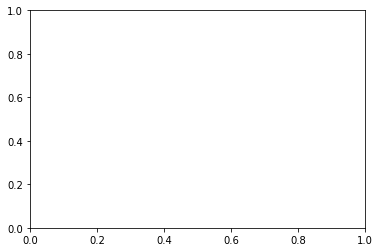

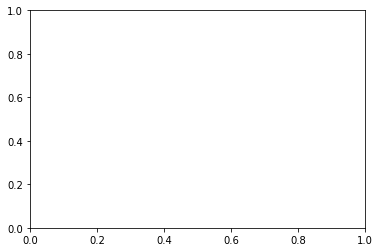

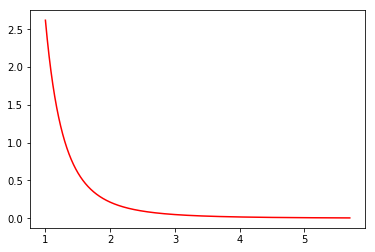

In [ ]:
plt.show()